# **Sprint 1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn import linear_model
from sklearn import metrics

In [2]:
# loading the data from csv file to Pandas DataFrame
train_data = pd.read_csv('new data.csv')

In [3]:
# first 5 rows of the dataframe
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train_data['Item_Identifier'].unique().count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [16]:
# number of data points & number of features
train_data.shape


(14204, 12)

In [17]:
# getting some information about thye dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB






Categorical Features:

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type

In [18]:
# checking for missing values
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

Mean --> average

Mode --> more repeated value

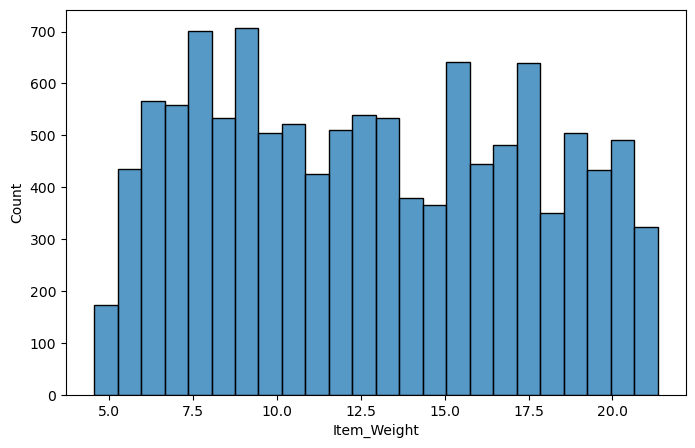

In [19]:
# Item_Weight distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=train_data, x='Item_Weight')
plt.show()

In [20]:
# mean value of "Item_Weight" column
train_data['Item_Weight'].mean()


12.792854228644284

In [21]:
# filling the missing values in "Item_weight column" with "Mean" value
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)

C:\Users\anand\AppData\Local\Temp\ipykernel_26660\2690122403.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)


In [22]:
# mode of "Outlet_Size" column
train_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [23]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = train_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [24]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [25]:
miss_values = train_data['Outlet_Size'].isnull()

In [26]:
print(miss_values)

0        False
1        False
2        False
3         True
4        False
         ...  
14199    False
14200    False
14201     True
14202     True
14203     True
Name: Outlet_Size, Length: 14204, dtype: bool


In [27]:
train_data.loc[miss_values, 'Outlet_Size'] = train_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [28]:
# checking for missing values
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Data Analysis**

In [29]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2179.842980
std,4.234226,0.051459,62.086938,8.371664,1553.890265
min,4.555000,0.000000,31.290000,1985.000000,-100.129007
25%,9.300000,0.027036,94.012000,1987.000000,942.772800
50%,12.792854,0.054021,142.247000,1999.000000,1892.448562
75%,16.000000,0.094037,185.855600,2004.000000,3141.987570
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


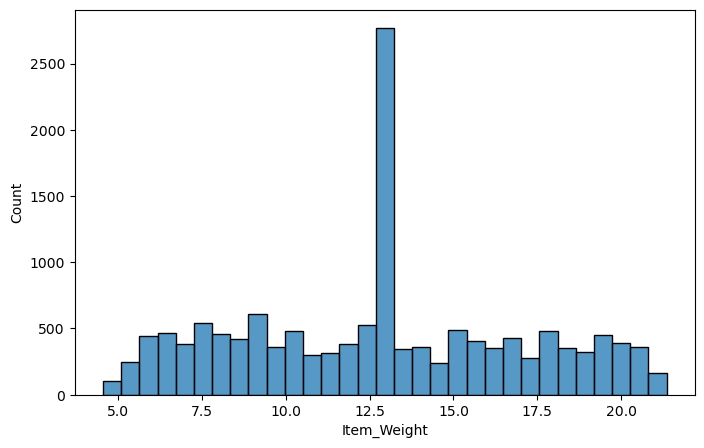

In [30]:
# Item_Weight distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=train_data, x='Item_Weight')
plt.show()

<Figure size 800x500 with 0 Axes>

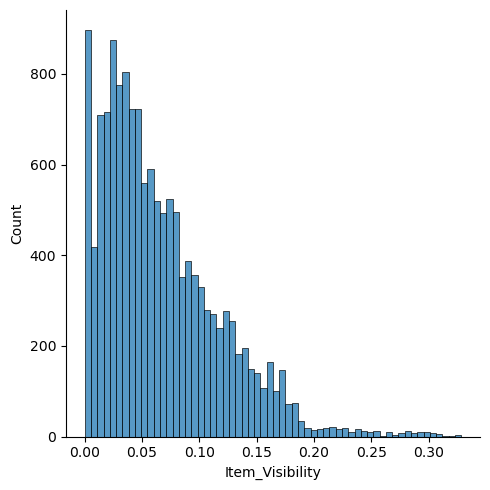

In [31]:
# Item Visibility distribution
plt.figure(figsize=(8,5))
sns.displot(data=train_data, x='Item_Visibility')
plt.show()

<Figure size 800x500 with 0 Axes>

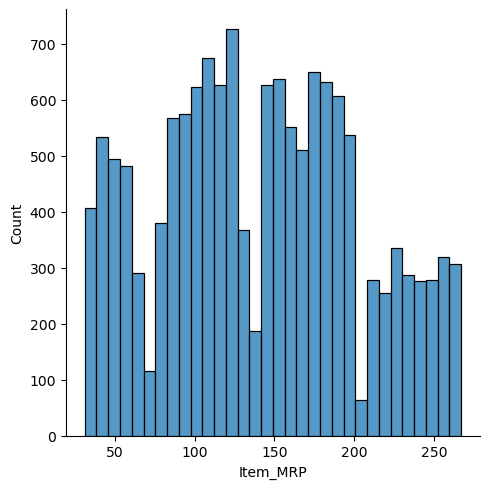

In [32]:
# Item MRP distribution
plt.figure(figsize=(8, 5))
sns.displot(data=train_data, x='Item_MRP')
plt.show()


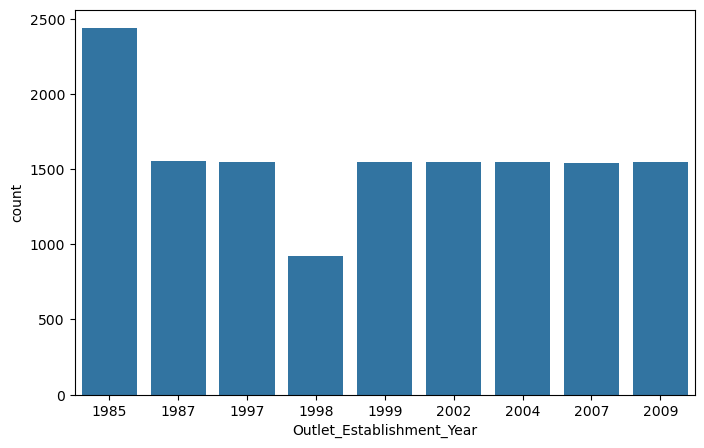

In [33]:
# Outlet_Establishment_Year column
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Establishment_Year', data=train_data)
plt.show()

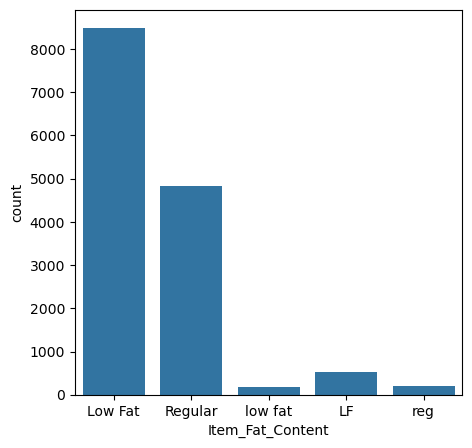

In [34]:
# Item_Fat_Content column
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=train_data)
plt.show()

In [35]:
train_data['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

**I've identified that the "Item_Fat_Content" column initially contains 5 categories, but in reality, there are only 2 distinct categories. Therefore, I'm planning to simplify these 5 categories into just 2.**

In [36]:
train_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [37]:
train_data['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

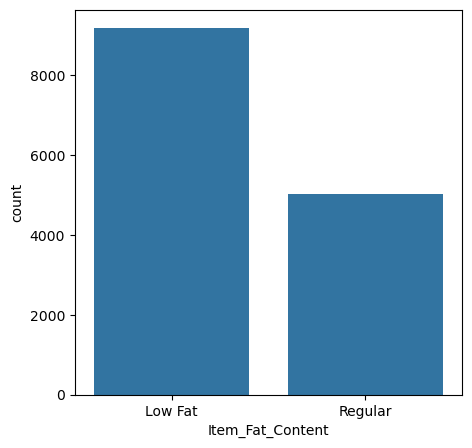

In [38]:
# Item_Fat_Content column
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=train_data)
plt.show()

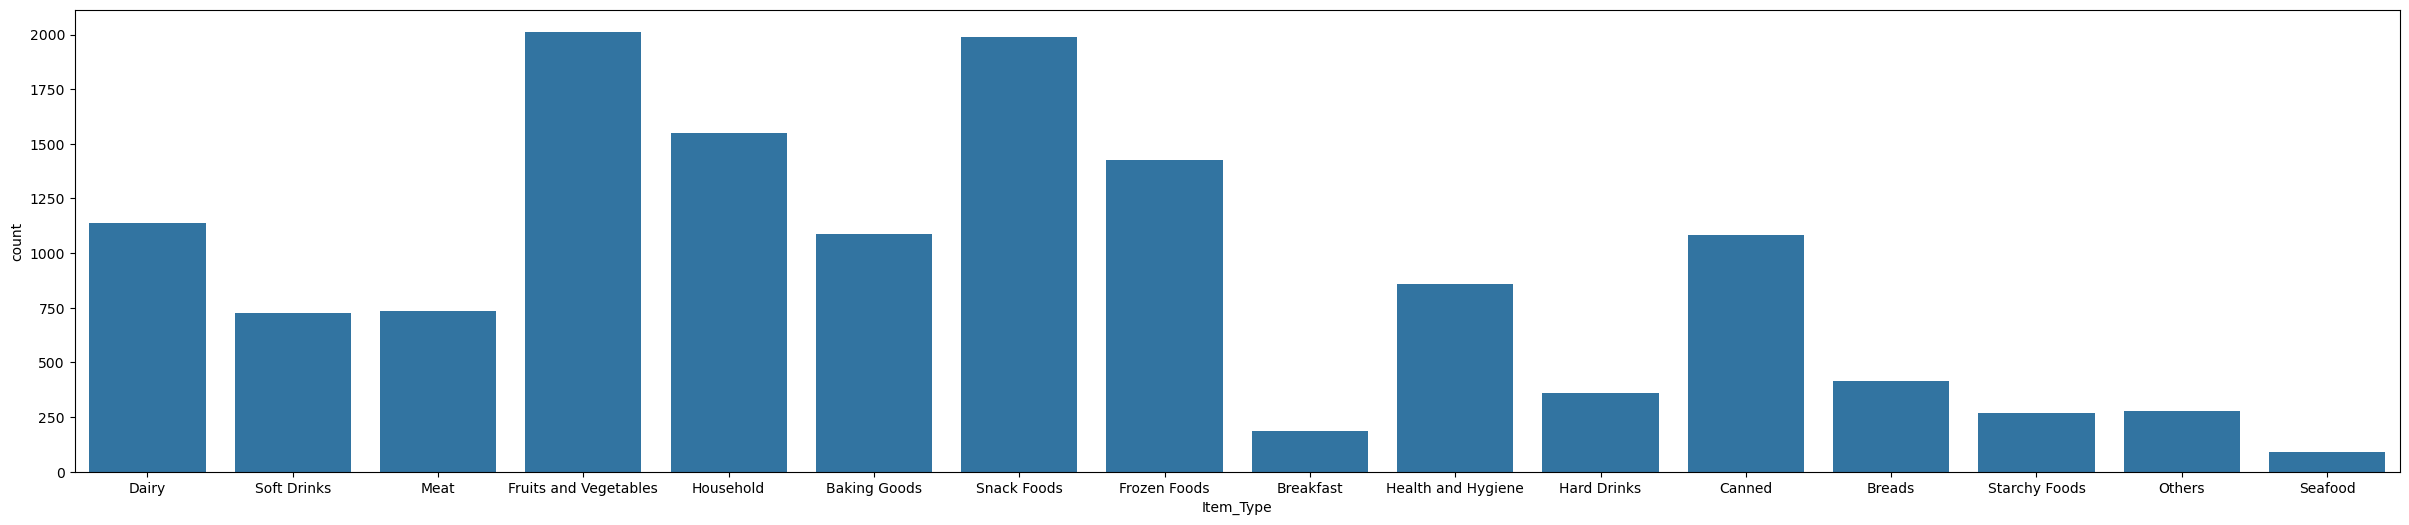

In [39]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=train_data)
plt.show()

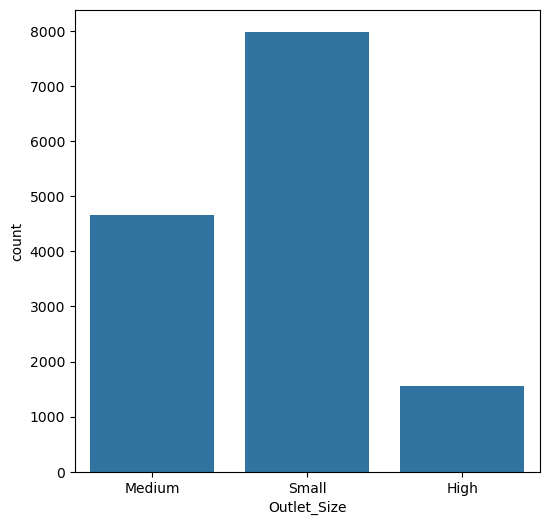

In [40]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=train_data)
plt.show()

In [41]:
train_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.792854,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


#**Sprint 2**

Dropping the unwanted features from the dataset like feature and outlet identifier and the output class item outlet sales

In [42]:
X=train_data.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
y=train_data['Item_Outlet_Sales']

Found 5 categorical valued features so we need to convert those into numerical values

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                14204 non-null  float64
 1   Item_Fat_Content           14204 non-null  object 
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Establishment_Year  14204 non-null  int64  
 6   Outlet_Size                14204 non-null  object 
 7   Outlet_Location_Type       14204 non-null  object 
 8   Outlet_Type                14204 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 998.8+ KB


**Label Encoding**

In [44]:

encoder = LabelEncoder()

In [45]:
#converting categorical values into numerical values
X['Item_Fat_Content'] = encoder.fit_transform(X['Item_Fat_Content'])

X['Item_Type'] = encoder.fit_transform(X['Item_Type'])

X['Outlet_Size'] = encoder.fit_transform(X['Outlet_Size'])

X['Outlet_Location_Type'] = encoder.fit_transform(X['Outlet_Location_Type'])

X['Outlet_Type'] = encoder.fit_transform(X['Outlet_Type'])

In [46]:
train_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [47]:
X.head(50)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300000,0,0.016047,4,249.8092,1999,1,0,1
1,5.920000,1,0.019278,14,48.2692,2009,1,2,2
2,17.500000,0,0.016760,10,141.6180,1999,1,0,1
3,19.200000,1,0.000000,6,182.0950,1998,2,2,0
4,8.930000,0,0.000000,9,53.8614,1987,0,2,1
5,10.395000,1,0.000000,0,51.4008,2009,1,2,2
6,13.650000,1,0.012741,13,57.6588,1987,0,2,1
7,12.792854,0,0.127470,13,107.7622,1985,1,2,3
8,16.200000,1,0.016687,5,96.9726,2002,2,1,1
9,19.200000,1,0.094450,5,187.8214,2007,2,1,1


In [48]:
X.iloc[130:160]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
130,12.792854,0,0.033810,3,180.5976,1985,1,2,3
131,13.500000,0,0.072669,9,160.2920,1997,2,0,1
132,12.792854,0,0.144338,8,224.4404,1985,1,2,3
133,8.890000,0,0.009163,5,101.7016,1998,2,2,0
134,7.855000,0,0.011307,3,188.5188,2009,1,2,2
135,7.235000,0,0.076856,9,116.0492,1997,2,0,1
136,12.792854,0,0.059957,15,165.4526,1985,1,2,3
137,6.920000,0,0.038532,4,60.5852,2002,2,1,1
138,9.300000,0,0.043210,6,90.8172,2007,2,1,1
139,18.500000,0,0.056816,11,132.1284,1998,2,2,0


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

**Doing the same preprocessing to the test data file**

In [50]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(9942, 9) (4262, 9) (9942,) (4262,)


#### training model using linear regression

In [51]:
reg_lr = linear_model.LinearRegression()
reg_lr.fit(X_train, y_train)

LinearRegression()

In [52]:
training_data_prediction = reg_lr.predict(X_train)
score_train = str(reg_lr.score(X_train, y_train))
r2_train = metrics.r2_score(y_train, training_data_prediction)
r2_train_mse= metrics.mean_squared_error(y_train, training_data_prediction)
r2_train_mae= metrics.mean_absolute_error(y_train, training_data_prediction)
print('score value',score_train)
print('R_2 Score value= ', r2_train)
print('MAE value= ', r2_train_mae)
print('RMSE value= ',np.sqrt(r2_train_mse))

score value 0.592018965356394
R_2 Score value=  0.592018965356394
MAE value=  699.9435370835347
RMSE value=  990.5544916708371


In [53]:
test_data_prediction1 = reg_lr.predict(X_test)
score_test = str(reg_lr.score(X_test, y_test))
r2_test = metrics.r2_score(y_test, test_data_prediction1)
r2_train_mse1= metrics.mean_squared_error(y_test, test_data_prediction1)
r2_train_mae1= metrics.mean_absolute_error(y_test, test_data_prediction1)
print('score value',score_test)
print('R_2 Score value = ', r2_test)
print('MAE value= ', r2_train_mae1)
print('RMSE value= ',np.sqrt(r2_train_mse1))

score value 0.6003006448540655
R_2 Score value =  0.6003006448540655
MAE value=  707.3275268771117
RMSE value=  986.770313541439


#### training the model using Randomforest regressor

In [54]:
reg_fr = RandomForestRegressor(n_estimators=10,random_state=42)
reg_fr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [55]:
training_data_prediction = reg_fr.predict(X_train)
score_train = str(reg_fr.score(X_train, y_train))
r2_train = metrics.r2_score(y_train, training_data_prediction)
r2_train_mse= metrics.mean_squared_error(y_train, training_data_prediction)
r2_train_mae= metrics.mean_absolute_error(y_train, training_data_prediction)
print('score value',score_train)
print('R_2 Score value= ', r2_train)
print('MAE value= ', r2_train_mae)
print('RMSE value= ',np.sqrt(r2_train_mse))

score value 0.9386782521254207
R_2 Score value=  0.9386782521254207
MAE value=  234.5539864774108
RMSE value=  384.03043720571503


In [56]:
test_data_prediction1 = reg_fr.predict(X_test)
score_test = str(reg_fr.score(X_test, y_test))
r2_test = metrics.r2_score(y_test, test_data_prediction1)
r2_train_mse1= metrics.mean_squared_error(y_test, test_data_prediction1)
r2_train_mae1= metrics.mean_absolute_error(y_test, test_data_prediction1)
print('score value',score_test)
print('R_2 Score value = ', r2_test)
print('MAE value= ', r2_train_mae1)
print('RMSE value= ',np.sqrt(r2_train_mse1))

score value 0.6481716498524309
R_2 Score value =  0.6481716498524309
MAE value=  596.8579988153296
RMSE value=  925.7948649502516


**Training the model using XGBoost Regressor**

In [57]:
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
training_data_prediction = regressor.predict(X_train)
score_train = str(regressor.score(X_train, y_train))
r2_train = metrics.r2_score(y_train, training_data_prediction)
r2_train_mse= metrics.mean_squared_error(y_train, training_data_prediction)
r2_train_mae= metrics.mean_absolute_error(y_train, training_data_prediction)
print('score value',score_train)
print('R_2 Score value= ', r2_train)
print('MAE value= ', r2_train_mae)
print('RMSE value= ',np.sqrt(r2_train_mse))

score value 0.8746197454628322
R_2 Score value=  0.8746197454628322
MAE value=  354.610296351628
RMSE value=  549.1272018953881


In [59]:
test_data_prediction1 = regressor.predict(X_test)
score_test = str(regressor.score(X_test, y_test))
r2_test = metrics.r2_score(y_test, test_data_prediction1)
r2_train_mse1= metrics.mean_squared_error(y_test, test_data_prediction1)
r2_train_mae1= metrics.mean_absolute_error(y_test, test_data_prediction1)
print('score value',score_test)
print('R_2 Score value = ', r2_test)
print('MAE value= ', r2_train_mae1)
print('RMSE value= ',np.sqrt(r2_train_mse1))

score value 0.657626561611998
R_2 Score value =  0.657626561611998
MAE value=  581.3786459260241
RMSE value=  913.2704040675336


In [60]:
pred = regressor.predict(np.array([[13.650000, 1, 0.012741, 13, 57.6588,1987, 0, 2,1]]))
print(pred)

[840.7078]


In [61]:
X_train.head(20)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8300,7.510000,0,0.104236,13,111.7544,2009,1,2,2
7242,6.780000,1,0.000000,0,95.0120,1999,1,0,1
3604,17.700000,1,0.016583,6,50.5034,1987,0,2,1
11016,12.792854,1,0.091134,10,180.6292,1985,1,2,3
10577,16.750000,0,0.032719,8,194.2162,2009,1,2,2
12933,7.325000,0,0.093575,6,90.3146,2002,2,1,1
13595,7.350000,0,0.028639,6,41.7454,1999,1,0,1
3454,20.700000,0,0.169667,3,183.5266,1987,0,2,1
13017,16.200000,1,0.016721,5,96.1726,2009,1,2,2
5887,9.195000,0,0.101295,0,46.2744,1997,2,0,1


In [62]:
pred = regressor.predict(np.array([[9.300000,0,0.016047,4,249.8092,1999,1,0,1]]))
print(pred)

[5457.794]


In [63]:
pred = regressor.predict(np.array([[5.920000,1,0.019278,14,48.2692,2009,1,2,2]]))
print(pred)

[591.017]


In [64]:

pred = regressor.predict(np.array([[17.500000,0,0.016760,10,200.6180,1999,1,0,1]]))
print(pred)

[3224.9558]


In [65]:

pred = regressor.predict(np.array([[19.200000,1,0.094450,5,187.8214,2007,2,1,1]]))
print(pred)

[3819.158]


In [66]:

pred = regressor.predict(np.array([[7.905000,0,0.010053,13,500.0408,2009,1,2,2]]))
print(pred)

[5148.6064]


In [67]:

pred = regressor.predict(np.array([[12.792854,0,0.057557,0,107.6938,1985,2,0,0]]))
print(pred)

[259.5668]


In [68]:
#save the model
import joblib
joblib.dump(regressor,'model.pkl')


['model.pkl']

In [69]:
joblib.load('model.pkl')

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
pred = regressor.predict(np.array([[12.792854,0,0.057557,0,107.6938,1998,1,2,0]]))
print(pred)

[210.9309]
